In [1]:
# import pandas as pd
# import numpy as np
# import math
import matplotlib.pyplot as plt
# import matplotlib
# from lmfit import models
from utils.scopeutil import *
from utils.OOMFormatter import OOMFormatter
from models.T1_simple_model import *
from scipy import stats 

# Onderstaande code betreft het mengsel aceton en koperchloride in verhouding 1:1

In [9]:
def process_T1_results(stof, verhouding, trim_tail=0):
    My_delay_pairs = []
    for (delay, df) in get_df_of_all_delays(
            stof,
            verhouding,
            T=T1,
            signal_index=SI_SIGNAL):

        My = My_for_T1_df(df)

        # we willen de absolute waarde van alles
        # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
        My = max(0, My)

        My_delay_pairs.append((My, delay))

    M0 = My_delay_pairs[len(My_delay_pairs) - 1][0]

    # eerste drie elementen weghalen omdat die niet goed in ons onderzoek passen
    # Bij de eerste 4 elementen hebben we zo dicht gemeten op pi dat het geen aangroei tijd had
    # De meetpunten in dat gebied zijn weggehaald
    My_delay_pairs = My_delay_pairs[trim_tail:]

    fit_T1 = model_T1.fit([My for (My, delay) in My_delay_pairs], t=[delay for (My, delay) in My_delay_pairs], M0=M0, T1=1000, weights=np.array([1 for _ in range(len(My_delay_pairs))]))
    fit_T1.plot()

    pvalue = 1 - stats.chi2.cdf(fit_T1.chisqr, fit_T1.nfree)
    print(f"De p waarde is {pvalue:.9f}.")

    fit_T1.fit_report()

De p waarde is 0.515198154.


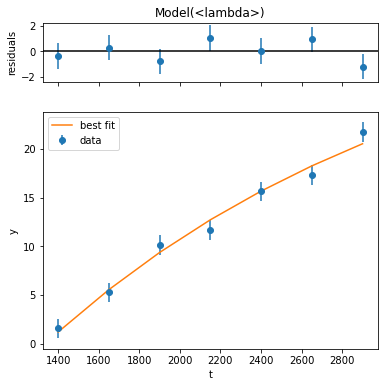

In [10]:
process_T1_results(STOF_KOPERCHLORIDE_ACETOON, "1_1", trim_tail=4)

De p waarde is 0.000044759.


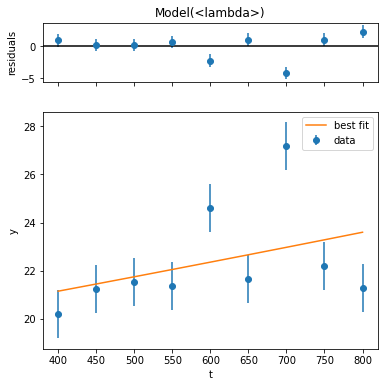

In [11]:
process_T1_results(STOF_KOPERCHLORIDE_A, "1_0")

De p waarde is 0.000000189.
De p waarde is 0.000007581.


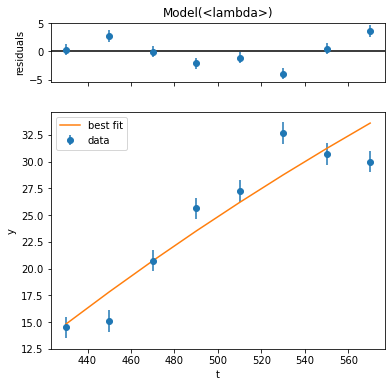

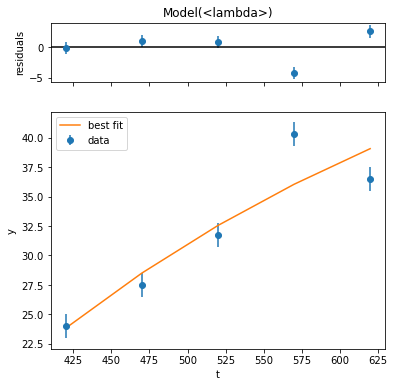

In [13]:
process_T1_results(STOF_KOPERCHLORIDE_B, "1_0")

process_T1_results(STOF_KOPERCHLORIDE_B, "1_1")

De p waarde is 0.094856132.


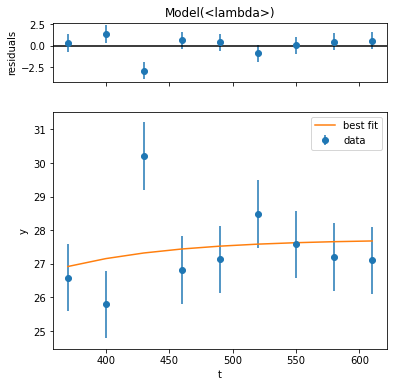

In [14]:
process_T1_results(STOF_ACETOON, "1_0")

# Nu gaan we over op koperchloride

## Koperchloride A, verhouding 1:0

[16.9000010125, 17.6000003875, 17.733333591666668, 17.9333333875, 20.900000965833332, 18.1999998, 22.933333555, 18.56666685, 17.433333870833334]
[400, 450, 500, 550, 600, 650, 700, 750, 800]
De p waarde is 0.000394964.


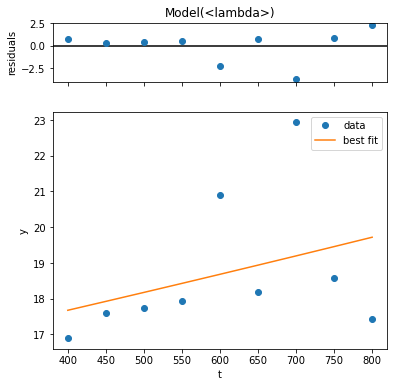

In [36]:
Mz_lijst_koperchloride_A = []
delays_A = []

for (delay, df) in get_df_of_all_delays(
        stof=STOF_KOPERCHLORIDE_A,
        verhouding="1_0",
        T=T1,
        signal_index=SI_SIGNAL):

    mz_A = My_for_T1_df(df)
    # we willen de absolute waarde van alles
    # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
    if mz < 0:
        mz = mz * -1
    
    Mz_lijst_koperchloride_A.append(mz_A)
    delays_A.append(delay)

print(Mz_lijst_koperchloride_A)
print(delays_A)

M0 = Mz_lijst_koperchloride_A[0]

fit_T1 = model_T1.fit(Mz_lijst_koperchloride_A, t=delays_A, M0=M0, T1=1000) #weights=np.array([1 for _ in range(9)]))
fit_T1.plot()
fit_T1

pvalue = 1 - stats.chi2.cdf(fit_T1.chisqr, fit_T1.nfree) 
print(f"De p waarde is {pvalue:.9f}.")

## Door naar koperchloride B, verhouding 1:0